# Introduction to Neural Networks Regression

TensorFlow provides a comprehensive and usable API to create complex models. The purpose of this network is to analyze regression problems through TensorFlow's Keras API.

* https://www.tensorflow.org/api_docs/python/tf/keras

I am going to simplify regression problems by predicting a numerical variable based on some other combination of variables. For this notebook, I am going to generate a simple dataset to build simple models.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from py_learning_toolbox import ml_toolbox
import tensorflow as tf

## Helpers

Utility functions used in this notebook to mitigate copied code.

In [2]:
def plot_predictions(train_data: tf.Tensor,
                     train_labels: tf.Tensor,
                     test_data: tf.Tensor,
                     test_labels: tf.Tensor,
                     predictions: tf.Tensor) -> None:
    """ Plots training data, test data, and compares predictions against actual values.

        Args:
            train_data (tf.Tensor): training data to plot on X-axis
            train_labels (tf.Tensor): training data to plot on y-axis
            test_data (tf.Tensor): test data to plot on X-axis
            test_labels (tf.Tensor): test data to plot on y-axis
            predictions (tf.Tensor): predictions to plot on X-axis
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

In [3]:
def mae(y_true: tf.Tensor, pred: tf.Tensor) -> tf.Tensor:
    """ Helper utility to calculate the mean absolute error

        Args:
            y_true (tf.Tensor): the actual values
            pred (tf.Tensor): the predicted values

        Returns:
            (tf.Tensor) the mean absolute error
    """
    return tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_true), y_pred=tf.squeeze(pred))

In [4]:
def mse(y_true: tf.Tensor, pred: tf.Tensor) -> tf.Tensor:
    """ Helper utility to calculate the mean squared error

        Args:
            y_true (tf.Tensor): the actual values
            pred (tf.Tensor): the predicted values

        Returns:
            (tf.Tensor) the mean squared error
    """
    return tf.metrics.mean_squared_error(y_true=tf.squeeze(y_true), y_pred=tf.squeeze(pred))

## Creating & Analyzing Datasets

### Creating Datasets

The two datasets will represent linear datapoints.

* Dataset-1: Small dataset of linear, x, y coordinates (y = x + 10)
* Dataset-2: Large dataset of linear, x, y coordinates (y = x + 10)

In [5]:
# Creating some sample data for regression
X_small = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
y_small = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))  # y = x + 10
X_small, y_small

2023-09-13 17:20:07.280149: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-13 17:20:07.280176: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-13 17:20:07.280180: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-13 17:20:07.280240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-13 17:20:07.280489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
# Making a bigger set of data.
X_large = tf.range(-100, 100, 4)
y_large = X_large + 10
X_large, y_large

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Analyzing Dataset

Looking into the dataset to get a better visualization of what I am working with.

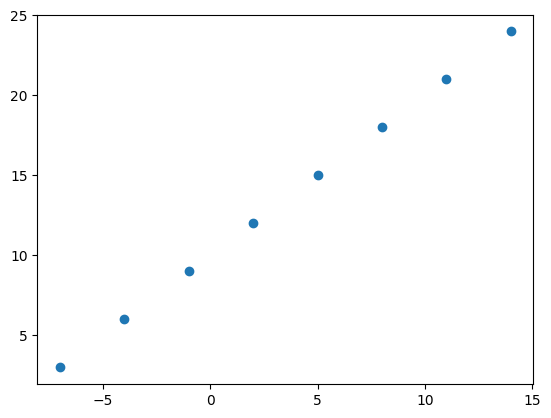

In [7]:
# Plotting the data
plt.scatter(X_small, y_small)

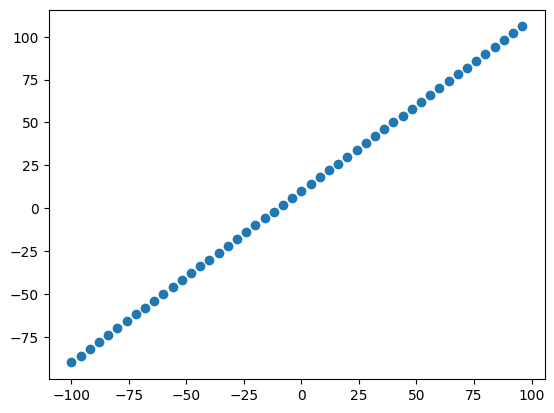

In [8]:
# Visualize the data
plt.scatter(X_large, y_large)

In [9]:
# Figuring out input and output shape for X and y?
# NOTE: This doesn't work, the input shape should be (1,) and output shape should be (1,)
input_shape = X_small.shape
output_shape = y_small.shape

input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

### Splitting Data
Need to split my complete data set into a training set and a test set

**NOTE: There are typically 3 sets to split the data with**
1. **Training Set**: Typically 70-80% of the data available used to train the model
2. **Validation Set**: The data the model gets tuned on. Typically 10-15%.
3. **Test Set**: The model gets evaluated on this data to teest what it has learned. Typically 10-15% of data.

In [10]:
# Figuring out the Training and Test Set Sizes
total_units = len(X_large)

# Get the training set (80%)
# NOTE: Typically, we should shuffle the data before splitting

X_train = X_large[:int(total_units * 0.8)]
y_train = y_large[:int(total_units * 0.8)]

X_test = X_large[int(total_units * 0.8):]
y_test = y_large[int(total_units * 0.8):]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

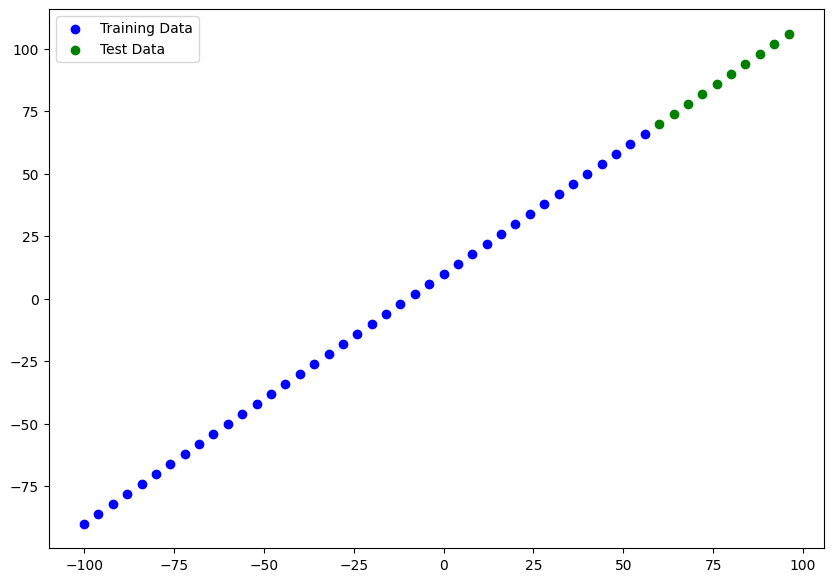

In [11]:
# Visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend()

## Experiments - Simple Linear Line

To test out neural network models to solve regression problems, I am going to run a handful of experiments to analyzing the linear point dataset.

* Experiment-0: Simple Model (No Hidden Layers)
* Experiment-1: More Epochs
* Experiment-2: Add Hidden Layer
* Experiment-3: Adam Optimizer
* Experiment-4: Introducing Larger Dataset
* Experiment-5: Single Hidden-Layer Model
* Experiment-6: Increase epochs to 100
* Experiment-7: Add a 2nd Hidden Layer with epochs at 100
* Experiment-8: Add a 2nd Hidden Layer with epochs at 500


### Steps in Modeling with TensorFlow

1. Creating a model: define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model: define the loss function (in other words, the function which tellls our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model: letting the model try to find patterns between X and y (features and labels).

### Evaluating a Model

In practice, a typical workflow you'll go through consists of the following:

create a model -> fit it -> evaluat it  -> tweak it -> repeat....

**Most Important to Eavluating**
Most important step of eavluating a model is to Visualize. It's a good idea to visualize:
* The data: what data are we working with? What does it look like?
* The model: What does our model look like?
* The training of the model: How does aa model perform while it learns?
* The predictions of the model: How accurate are the predictions?

### Visualizing a model¶
Visualizing a model can be done with a handful of tools.

Summary: Looking at the summary of the model and what it looks like.
Diagram: Looking at the diagram of the model.
Plot: Plotting the predictions of the model

### Evaluation Metrics

Depending on the problem, there will be different evaluation metrics to evaluate your model's performance.

Common Regression Metrics:
* **Mean Absolute Error**: The average absolute value of the difference between the prediction and the actual value.
* **Mean Square Error**: The average of the square of the difference between the prediction and the actual value.
  - Note: This is useful because the larger the difference, the MSE is drastically larger than just looking at the difference between the prediction and the actual value. TLDR: larger erros are more significant than smaller errors.
* **Huber**: Combination of MSE and MAE. Less sensitive to outliers than MSE, but more sensitive to larger errors than MAE.

### Constants

In [12]:
RANDOM_SEED = 42

INPUT_SHAPE = 1
OUTPUT_SHAPE = 1

TEST_INPUT = 17.0
TEST_OUTPUT = 21.0

### Experiment-0: Simple Model (No Hidden Layers)

Creating a simple model to iterate and improve upon.

In [13]:
# Set random seet
tf.random.set_seed(RANDOM_SEED)

# 1. Create a model using sequential api
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(OUTPUT_SHAPE)  # This defines the output layer of shape 1
])

model_0.input_shape, model_0.output_shape, model_0.layers

((None, 1), (None, 1), [<keras.src.layers.core.dense.Dense at 0x299d41820>])

In [14]:
# Compiling model
# losses.mae is Mean Absolute Error
# In short, this takes the average of the error between the prediction and the actual value
loss_function = tf.keras.losses.mae

# optimizers.SGD is Stochastic Gradient Descent
# NOTE: Using optimizers.legacy.SGD due to optimizers.SGD being slower on M1 Mac
optimizer = tf.keras.optimizers.legacy.SGD()

model_0.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['mae'])

In [15]:
# 3. Fit the model
model_0.fit(X_small,
            y_small,
            epochs=5)  # epochs is how many times the model runs through the training data

Epoch 1/5
1/1 [==============================] - 0s 197ms/step - loss: 16.6888 - mae: 16.6888
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 16.4075 - mae: 16.4075
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 16.1263 - mae: 16.1263
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 15.8450 - mae: 15.8450
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 15.5638 - mae: 15.5638


2023-09-13 17:20:07.926895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [16]:
# Testing predictions of the model
model_0.predict([TEST_INPUT])  # This is pretty far off, so next steps are to improve the model

2023-09-13 17:20:08.119096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 40ms/step


array([[-8.254163]], dtype=float32)

### Experiment-1: Simple Model w/ More Epochs

We can improve our model by altering the steps we took to create a model.

1. **Creating a Model**: We can add more layers, increase number of neurons in each hidden layer, change the activation function of each layer.
2. **Compiling a Model**: We can change the loss function, use a different optimization function, or the learning rate of the optimization function.
3. **Fitting a Model**: We can fit a model with more epochs (cycle through training data more times) or on more data (give more examples to learn from).

**NOTE**: It is better to start with a smaller model, then improve upon the model.

Only difference between Trial 1 and Trial 2 is I will increase the epochs (number of cycles trained through the training data).

In [17]:
# Constants
EPOCHS_1 = 100

In [18]:
# Rebuilding/Improving the Model
# Set random seet
tf.random.set_seed(RANDOM_SEED)

# Create model using sequential api
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(OUTPUT_SHAPE)  # This defines the output layer of shape 1
])

# Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=['mae'])

# Fit model (training for 100 epochs instead of 5)
model_1.fit(X_small,
            y_small,
            epochs=EPOCHS_1,
            verbose=0)  # epochs is how many times the model runs through the training data

2023-09-13 17:20:08.258331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [19]:
# Testing predictions of the model
model_1.predict([TEST_INPUT])  # This is pretty far off, so next steps are to improve the model

1/1 [==============================] - 0s 25ms/step


2023-09-13 17:20:09.024288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[29.883959]], dtype=float32)

### Experiment-2: Hidden Layer
Keeping epochs the same as Experiment-1, but adding a hidden layer.

In [20]:
# Constants
EPOCHS_2 = 100

In [21]:
# Rebuilding/Improving the Model
# Set random seet
tf.random.set_seed(RANDOM_SEED)

# Create model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

# Compiling Model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=['mae'])

# Fit Model
model_2.fit(X_small,
            y_small,
            epochs=EPOCHS_2,
            verbose=0)

2023-09-13 17:20:09.185524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [22]:
# Testing predictions of the model (Actual value should be 27)
model_2.predict([TEST_INPUT])  # Weird, this value prediction is not even close to the value, even though the mae is lower

1/1 [==============================] - 0s 34ms/step


2023-09-13 17:20:10.002300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[31.286152]], dtype=float32)

### Experiment-3: Adam Optimizer

Keeping epochs the same as Trial-2 and hidden layers from Trial-3, but changing the optimizer

In [23]:
# Constants
EPOCHS_3 = 100

LEARNING_RATE = 0.01

In [24]:
# Rebuilding/Improving the Model
# Set random seet
tf.random.set_seed(RANDOM_SEED)

# Create model using sequential api
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

# Compile Model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE),
                metrics=['mae'])

# Fit Model
model_3.fit(X_small,
            y_small,
            epochs=EPOCHS_3,
            verbose=0)

2023-09-13 17:20:10.186225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [25]:
# Testing predictions of the model (Actual value should be 27)
model_3.predict([TEST_INPUT])

1/1 [==============================] - 0s 30ms/step


2023-09-13 17:20:11.072735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[28.479425]], dtype=float32)

### Experiment-4: Big Data w/ Small Learning Rate

In [26]:
# Constants
EPOCHS_4 = 10

LEARNING_RATE_4 = 0.005

In [27]:
# 1. Create Model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='InputLayer'),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='OutputLayer'),
])

# 2. Compile Model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_4),
                metrics=['mae'])


# 3. Fit Model
model_4.fit(X_train,
            y_train,
            epochs=EPOCHS_4,
            verbose=0)

2023-09-13 17:20:11.216609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [28]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer-1 (Dense)       (None, 100)               200       
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params: the total parameters in the model.
* Trainable params: the parameters (patterns) the model can update as it trains.
* Non-trainable params: the parameters (patterns) that the model does not update as it trains. This occurrs when using an already trained model from transfer learning.

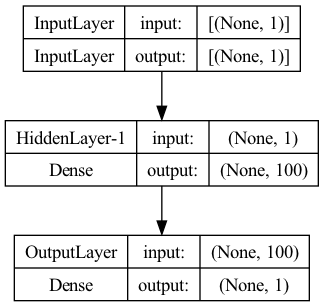

In [29]:
ml_toolbox.analysis.model.plot_model(model_4)

#### Visualizing the Predictions

Plotting predictions against the actual values can help better visualize the model. This is often in the form of y_test or y_true versus y_pred.

In [30]:
# Make Some predictions
y_pred = model_4.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 31ms/step


2023-09-13 17:20:11.971856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(array([[ 68.35912 ],
        [ 72.886925],
        [ 77.41473 ],
        [ 81.94253 ],
        [ 86.47032 ],
        [ 90.99812 ],
        [ 95.525925],
        [100.05373 ],
        [104.58153 ],
        [109.10933 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

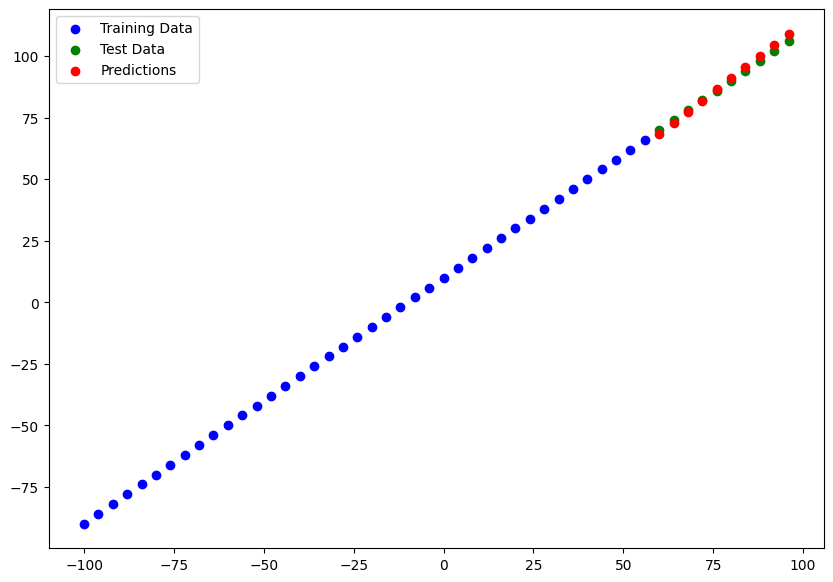

In [31]:
# Let's create a plotting function
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [32]:
# Evaluate the model on the test set
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 108ms/step - loss: 1.4136 - mae: 1.4136


2023-09-13 17:20:12.274511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[1.4135650396347046, 1.4135650396347046]

In [33]:
mae_4 = mae(y_true=tf.squeeze(y_test), pred=tf.squeeze(y_pred))
mse_4 = mse(y_true=tf.squeeze(y_test), pred=tf.squeeze(y_pred))
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=1.413565>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.8373168>)

### Experiment-5: Simple Model w/ Hidden Layer

In [34]:
# Constants
EPOCHS_5 = 50

LEARNING_RATE_5 = 0.005

In [35]:
# Create Model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='OutputLayer')
])

# Compile Model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_5),
                metrics=['mae'])

# Fit Model
model_5.fit(X_train, y_train, epochs=EPOCHS_5, verbose=0)

2023-09-13 17:20:12.495551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [36]:
# Testing the Model
predictions_5 = model_5.predict(X_test)

1/1 [==============================] - 0s 30ms/step


2023-09-13 17:20:13.196443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(<tf.Tensor: shape=(), dtype=float32, numpy=15.2747345>,
 <tf.Tensor: shape=(), dtype=float32, numpy=234.71495>)

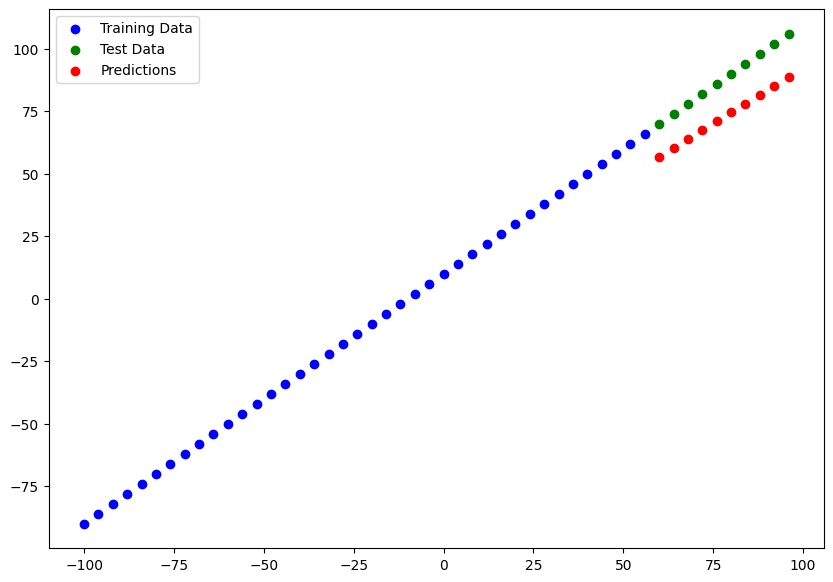

In [37]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_5)

mae_5 = mae(y_test, predictions_5)
mse_5 = mse(y_test, predictions_5)
mae_5, mse_5

### Experiment-6: More Epochs

In [38]:
# Constants
EPOCHS_6 = 100

LEARNING_RATE_6 = 0.005

In [39]:
# Create Model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='OutputLayer'),
])

# Compile Model
model_6.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_6),
              loss=tf.keras.losses.mae)

# Fit Model
model_6.fit(X_train,
            y_train,
            epochs=EPOCHS_6,
            verbose=0)

2023-09-13 17:20:13.465819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [40]:
# Testing the Model
predictions_6 = model_6.predict(X_test)

1/1 [==============================] - 0s 26ms/step


2023-09-13 17:20:14.508933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(<tf.Tensor: shape=(), dtype=float32, numpy=5.282866>,
 <tf.Tensor: shape=(), dtype=float32, numpy=28.191437>)

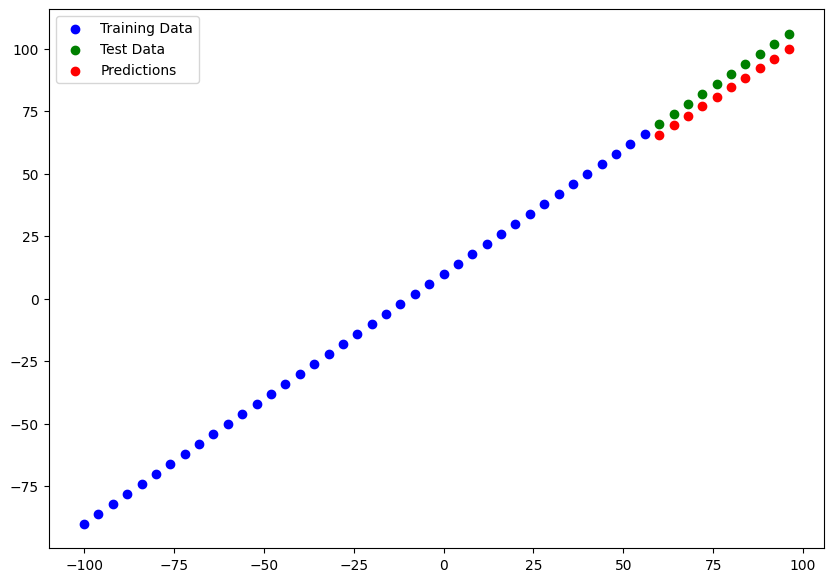

In [41]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_6)

mae_6 = mae(y_test, predictions_6)
mse_6 = mse(y_test, predictions_6)
mae_6, mse_6

### Experiment-7: Epochs-100, Hidden Layers=2

In [42]:
# Constants
EPOCHS_7 = 100
LEARNING_RATE_7 = 0.005

In [43]:
# Create Model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='OutputLayer')
])

# Compile Model
model_7.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_7),
              loss=tf.keras.losses.mae)

# Fit Model
model_7.fit(X_train, y_train, epochs=EPOCHS_7, verbose=0)

2023-09-13 17:20:14.806878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [44]:
# Testing the Model
predictions_7 = model_7.predict(X_test)

1/1 [==============================] - 0s 140ms/step


2023-09-13 17:20:16.018800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(<tf.Tensor: shape=(), dtype=float32, numpy=18.114342>,
 <tf.Tensor: shape=(), dtype=float32, numpy=333.52222>)

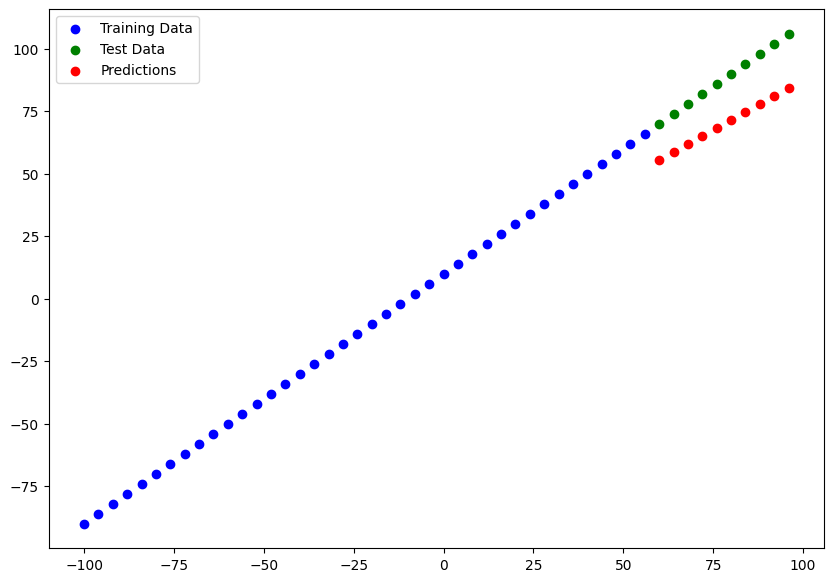

In [45]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_7)

mae_7 = mae(y_test, predictions_7)
mse_7 = mse(y_test, predictions_7)
mae_7, mse_7

### Experiment 8: Epochs=500, Hidden Layers=2

In [46]:
# Constants
EPOCHS_8 = 500
LEARNING_RATE_8 = 0.005

In [47]:
# Create Model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='OutputLayer')
])

# Compile Model
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(lr=LEARNING_RATE_8))

# Fit Model
model_8.fit(X_train, y_train, epochs=EPOCHS_8, verbose=0)

/Users/brandonkubick/Code/deep-learning-development/env/lib/python3.9/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-09-13 17:20:16.425795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [48]:
# Testing the Model
predictions_8 = model_8.predict(X_test)

1/1 [==============================] - 0s 29ms/step


2023-09-13 17:20:21.824004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(<tf.Tensor: shape=(), dtype=float32, numpy=4.103227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=17.151318>)

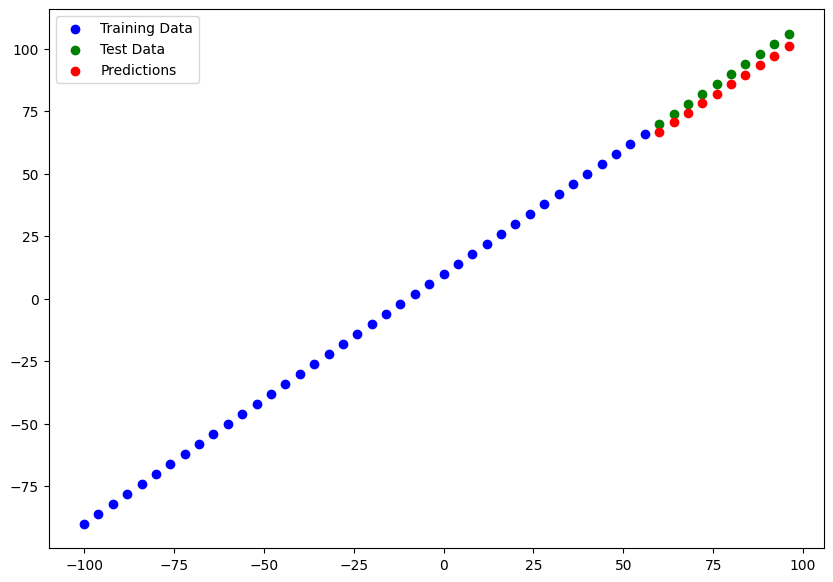

In [49]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_8)

mae_8 = mae(y_test, predictions_8)
mse_8 = mse(y_test, predictions_8)
mae_8, mse_8

## Analysis

Analyzing the last four experiments by comparing metrics against the test dataset.

In [50]:
model_results = [['model_5', mae_5.numpy(), mse_5.numpy()],
                 ['model_6', mae_6.numpy(), mse_6.numpy()],
                 ['model_7', mae_7.numpy(), mse_7.numpy()],
                 ['model_8', mae_8.numpy(), mse_8.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_5,15.274734,234.714951
1,model_6,5.282866,28.191437
2,model_7,18.114342,333.522217
3,model_8,4.103227,17.151318


## Tracking Experiments

A good habit for machine learning is to track experiments and their corresponding results.

Useful tools to help track experiments:
* TensorBoard: Component of the TensorFlow library to help track modeling experiments.
* Weights & Biases: tool used for tracking experiments (Should def look this one up!)

## Saving Models

Saving models allows using them outside of the place they were trained. 

* TensorFlow Docs: https://www.tensorflow.org/tutorials/keras/save_and_load
* Saving model can be done by `model.save("savedirpath")` or `model.save("h5filepath.h5")`
* Loading model can be done by `tf.keras.models.load_model("savedirpath")` or `tf.keras.models.load_model("h5filepath.h5")`